<a href="https://colab.research.google.com/github/EX1cyclone/635_project_pollution_detect/blob/main/CNN_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
from sklearn.preprocessing import MinMaxScaler

# Load dataset
file_path = '/content/drive/MyDrive/ECE635/beijing+multi+site+air+quality+data/PRSA2017_Data_20130301-20170228/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Handling missing values with linear spline interpolation
data.interpolate(method='linear', inplace=True)

# Encode categorical variables (Example: Wind Direction)
# Replace 'wind_direction_column' with your actual column name
if 'wind_direction_column' in data.columns:
    data['wind_direction_encoded'] = data['wind_direction_column'].apply(lambda x: ... )  # Define your encoding logic

# Normalize PM2.5 concentration and other features
scaler = MinMaxScaler()
data['PM2.5_normalized'] = scaler.fit_transform(data[['PM2.5']])  # Replace 'PM2.5' with your actual column name

# Feature selection using Pearson correlation
correlation_threshold = 0.5  # Define your correlation threshold
correlation_matrix = data.corr()
features = correlation_matrix.index[abs(correlation_matrix["PM2.5_normalized"]) > correlation_threshold]

# Selected features dataset
selected_data = data[features]


<ipython-input-2-b88a55376396>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'selected_data' is your preprocessed dataset
X = selected_data.drop('PM2.5_normalized', axis=1)  # Features
y = selected_data['PM2.5_normalized']  # Target variable

# Splitting the dataset into training and testing sets
# Adjust test_size as needed (e.g., 0.2 for 20%, 0.3 for 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert Pandas DataFrame to NumPy array and then reshape
num_features = X_train.shape[1]  # Number of features
num_timesteps = 1  # Set to 1 if your data is not time-series

X_train_reshaped = X_train.values.reshape((-1, num_timesteps, num_features))
X_test_reshaped = X_test.values.reshape((-1, num_timesteps, num_features))


Epoch 1/200
1169/1169 [==============================] - 14s 8ms/step - loss: 0.0012 - val_loss: 1.2606e-04
Epoch 2/200
1169/1169 [==============================] - 8s 7ms/step - loss: 9.4044e-04 - val_loss: 0.0019
Epoch 3/200
1169/1169 [==============================] - 8s 7ms/step - loss: 8.6594e-04 - val_loss: 0.0011
Epoch 4/200
1169/1169 [==============================] - 8s 7ms/step - loss: 8.4607e-04 - val_loss: 2.5733e-04
Epoch 5/200
1169/1169 [==============================] - 8s 7ms/step - loss: 7.3031e-04 - val_loss: 9.6442e-04
Epoch 6/200
1169/1169 [==============================] - 8s 7ms/step - loss: 7.0503e-04 - val_loss: 3.3052e-04
Epoch 7/200
1169/1169 [==============================] - 8s 7ms/step - loss: 6.4000e-04 - val_loss: 2.2841e-04
Epoch 8/200
1169/1169 [==============================] - 8s 7ms/step - loss: 6.4975e-04 - val_loss: 7.7556e-05
Epoch 9/200
1169/1169 [==============================] - 8s 7ms/step - loss: 5.9505e-04 - val_loss: 1.9419e-04
Epoch 10/200

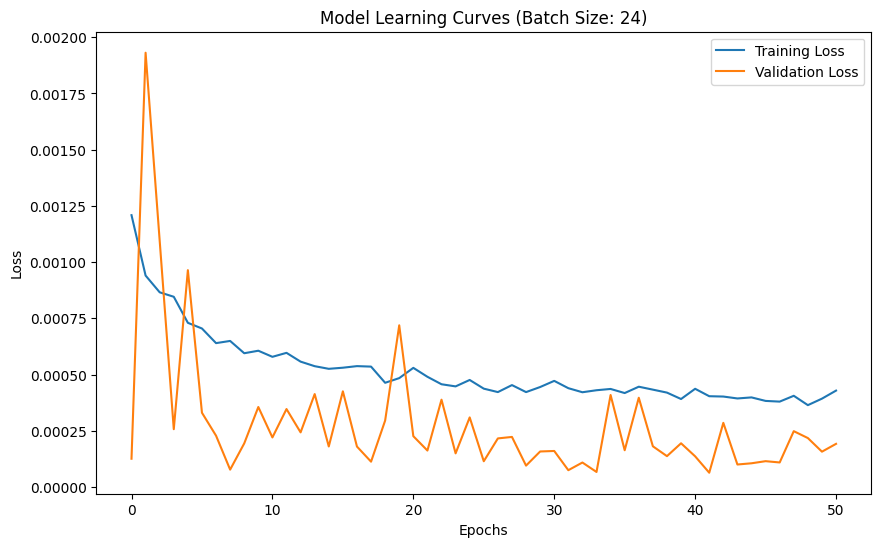

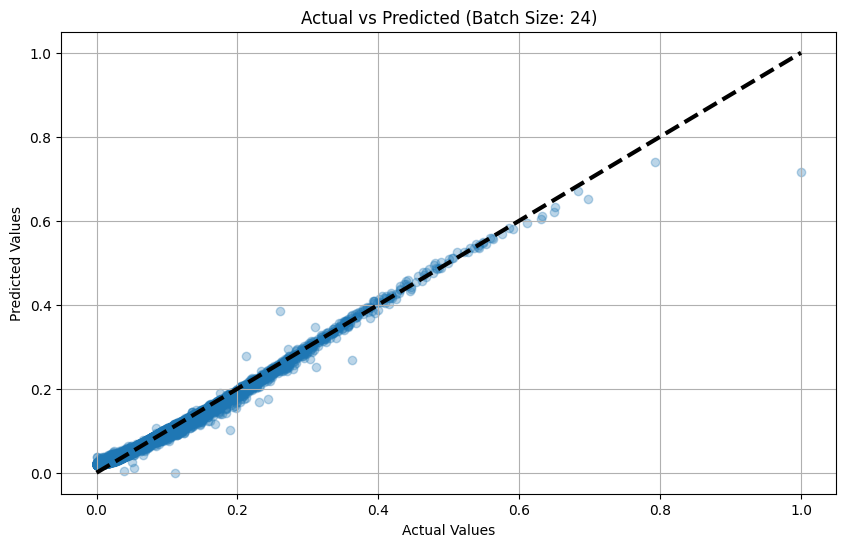

Epoch 1/200
877/877 [==============================] - 11s 8ms/step - loss: 9.4286e-04 - val_loss: 1.4072e-04
Epoch 2/200
877/877 [==============================] - 7s 7ms/step - loss: 7.1589e-04 - val_loss: 1.6312e-04
Epoch 3/200
877/877 [==============================] - 6s 7ms/step - loss: 6.8791e-04 - val_loss: 1.2642e-04
Epoch 4/200
877/877 [==============================] - 6s 7ms/step - loss: 6.5654e-04 - val_loss: 2.1449e-04
Epoch 5/200
877/877 [==============================] - 7s 7ms/step - loss: 5.9185e-04 - val_loss: 1.2109e-04
Epoch 6/200
877/877 [==============================] - 6s 7ms/step - loss: 5.8561e-04 - val_loss: 9.7937e-05
Epoch 7/200
877/877 [==============================] - 6s 7ms/step - loss: 5.7096e-04 - val_loss: 9.0607e-05
Epoch 8/200
877/877 [==============================] - 6s 7ms/step - loss: 5.5786e-04 - val_loss: 1.8669e-04
Epoch 9/200
877/877 [==============================] - 6s 7ms/step - loss: 5.3571e-04 - val_loss: 8.3552e-04
Epoch 10/200
877/8

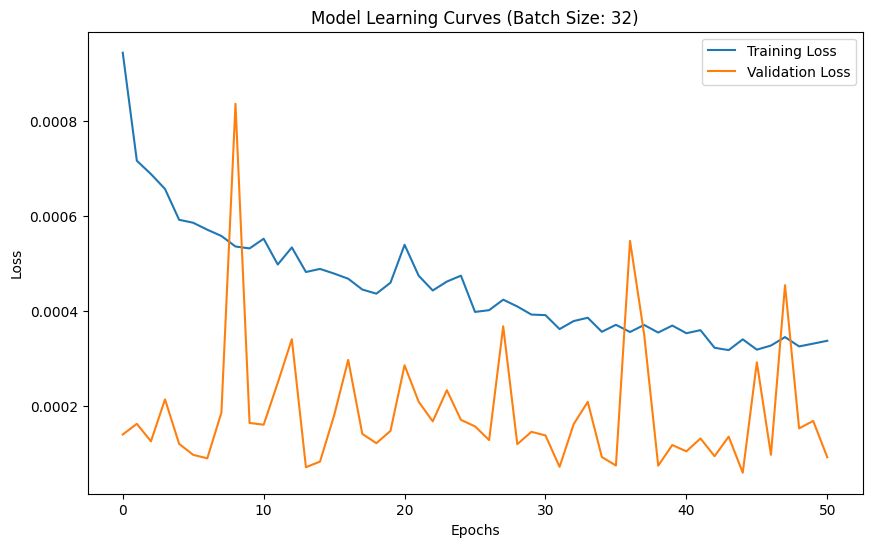

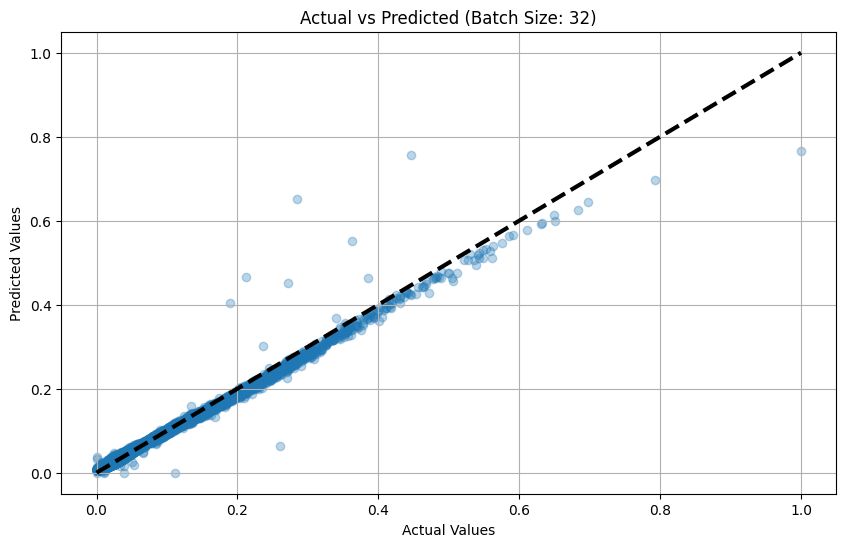

Epoch 1/200
439/439 [==============================] - 9s 9ms/step - loss: 8.4008e-04 - val_loss: 8.1363e-05
Epoch 2/200
439/439 [==============================] - 3s 8ms/step - loss: 4.3365e-04 - val_loss: 3.0279e-04
Epoch 3/200
439/439 [==============================] - 3s 8ms/step - loss: 4.7414e-04 - val_loss: 9.0446e-05
Epoch 4/200
439/439 [==============================] - 3s 7ms/step - loss: 3.8627e-04 - val_loss: 0.0012
Epoch 5/200
439/439 [==============================] - 3s 7ms/step - loss: 4.4685e-04 - val_loss: 3.4394e-05
Epoch 6/200
439/439 [==============================] - 4s 8ms/step - loss: 3.8846e-04 - val_loss: 2.9708e-04
Epoch 7/200
439/439 [==============================] - 3s 8ms/step - loss: 3.9722e-04 - val_loss: 1.6525e-04
Epoch 8/200
439/439 [==============================] - 3s 7ms/step - loss: 3.4385e-04 - val_loss: 3.2807e-04
Epoch 9/200
439/439 [==============================] - 3s 7ms/step - loss: 3.2181e-04 - val_loss: 4.2449e-05
Epoch 10/200
439/439 [=

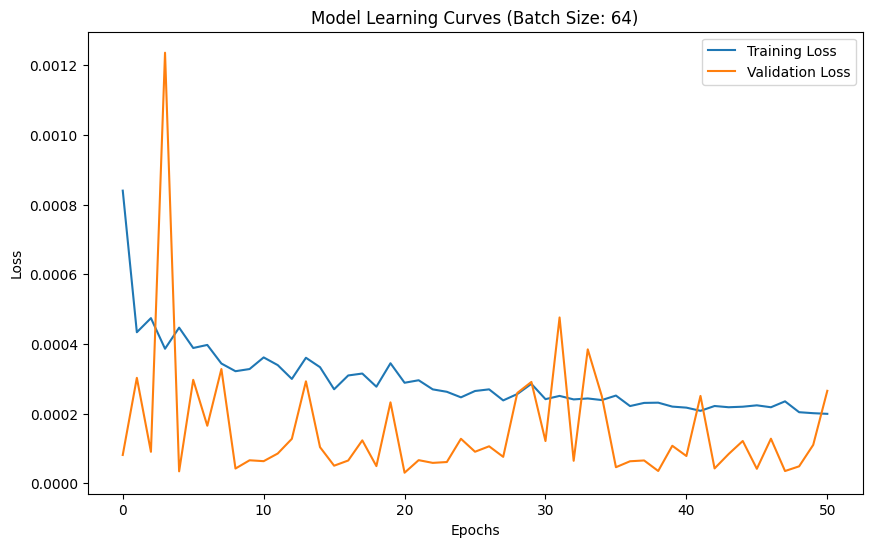

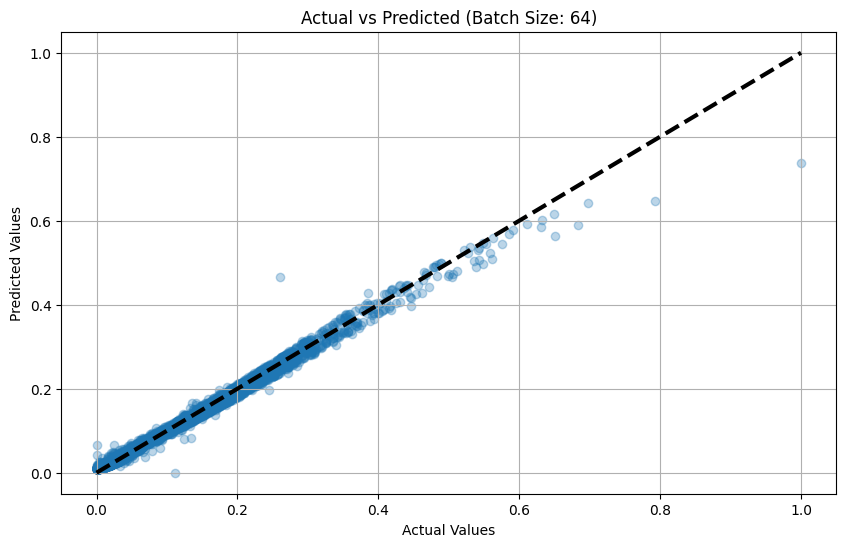

Epoch 1/200
220/220 [==============================] - 7s 11ms/step - loss: 0.0012 - val_loss: 1.3499e-04
Epoch 2/200
220/220 [==============================] - 2s 7ms/step - loss: 3.7461e-04 - val_loss: 5.7022e-05
Epoch 3/200
220/220 [==============================] - 2s 8ms/step - loss: 2.9114e-04 - val_loss: 3.1743e-04
Epoch 4/200
220/220 [==============================] - 2s 8ms/step - loss: 2.5278e-04 - val_loss: 4.2019e-04
Epoch 5/200
220/220 [==============================] - 2s 8ms/step - loss: 2.5770e-04 - val_loss: 7.4944e-05
Epoch 6/200
220/220 [==============================] - 2s 8ms/step - loss: 2.2404e-04 - val_loss: 1.3500e-04
Epoch 7/200
220/220 [==============================] - 2s 8ms/step - loss: 2.3434e-04 - val_loss: 2.9955e-05
Epoch 8/200
220/220 [==============================] - 2s 8ms/step - loss: 2.7465e-04 - val_loss: 3.1928e-05
Epoch 9/200
220/220 [==============================] - 2s 7ms/step - loss: 2.1024e-04 - val_loss: 5.7388e-05
Epoch 10/200
220/220 [

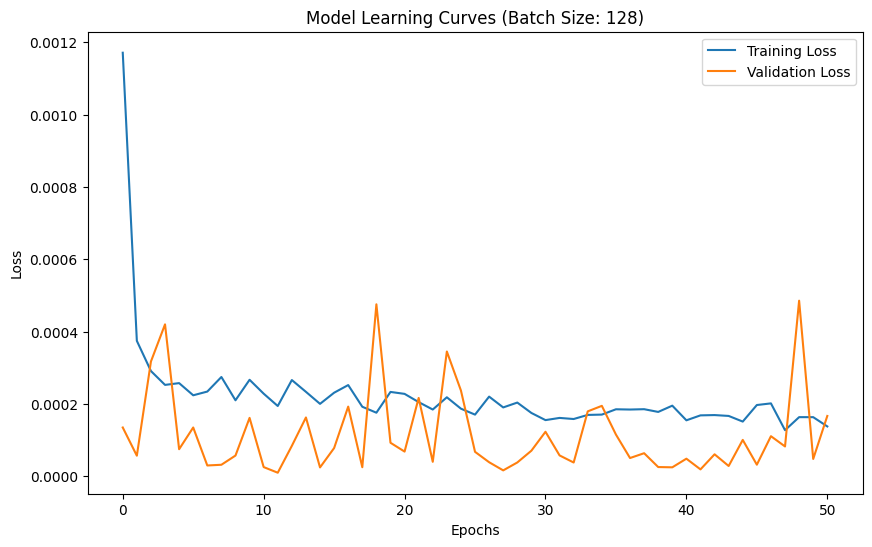

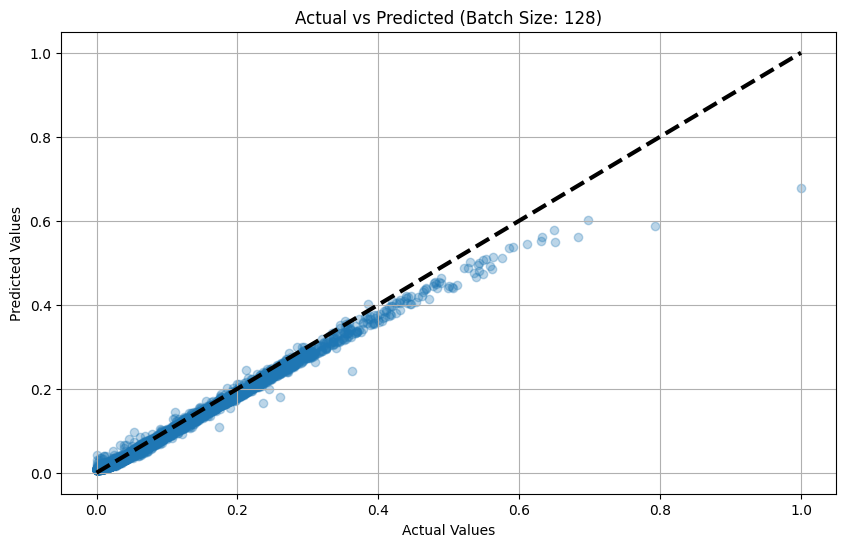

Batch Size: 24, MAE: 0.008244497701525688, RMSE: 0.011227559298276901, R2: 0.9841328939364336
Batch Size: 32, MAE: 0.005997683387249708, RMSE: 0.011862709186971188, R2: 0.9822868935622019
Batch Size: 64, MAE: 0.005648194346576929, RMSE: 0.009020145051181316, R2: 0.9897587245257912
Batch Size: 128, MAE: 0.007574564311653376, RMSE: 0.011618444696068764, R2: 0.9830088425355967


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import MeanAbsoluteError, RootMeanSquaredError
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GRU
from tensorflow.keras.callbacks import ReduceLROnPlateau

def build_cnn_gru_model(input_length, num_features):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(input_length, num_features)))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    # Add GRU layers
    model.add(GRU(64, return_sequences=True))  # GRU layer with return_sequences=True if followed by another GRU/RNN layer
    model.add(GRU(32, return_sequences=False))  # Last GRU layer with return_sequences=False
    #model.add(Flatten())  # If the last GRU layer has return_sequences=False, this Flatten layer can be removed
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='relu'))
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

def plot_actual_vs_predicted(y_true, y_pred, title='Actual vs Predicted'):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.3)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=3)
    plt.title(title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

input_length = X_train_reshaped.shape[1]
num_features = X_train_reshaped.shape[2]

batch_sizes = [24, 32, 64, 128]
results = {}

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=50, restore_best_weights=True)

for batch_size in batch_sizes:
    model = build_cnn_gru_model(input_length, num_features)
    history = model.fit(X_train_reshaped, y_train, epochs=200, batch_size=batch_size,
                        validation_data=(X_test_reshaped, y_test), callbacks=[early_stopping])

    y_pred = model.predict(X_test_reshaped)

    # Initialize metrics
    mae = MeanAbsoluteError()
    rmse = RootMeanSquaredError()
    mae.update_state(y_test, y_pred)
    rmse.update_state(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results including MAPE
    results[batch_size] = {
        'MAE': mae.result().numpy(),
        'RMSE': rmse.result().numpy(),
        'R2': r2
    }

    # Plotting the learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Learning Curves (Batch Size: {batch_size})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    plot_actual_vs_predicted(y_test, y_pred.flatten(), title=f'Actual vs Predicted (Batch Size: {batch_size})')


# Print results
for batch_size, metrics in results.items():
    print(f"Batch Size: {batch_size}, MAE: {metrics['MAE']}, RMSE: {metrics['RMSE']}, R2: {metrics['R2']}")
